<a href="https://colab.research.google.com/github/hasaninevitable/CODSOFT/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/dataset/Titanic-Dataset.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**EDA**
the very first thing we did was check for missing values(we used mean,mode) then we dropped colums which wasn't required for prediction.

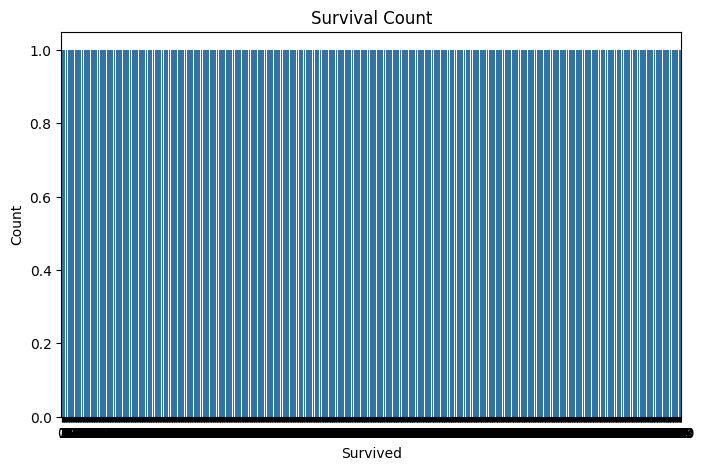

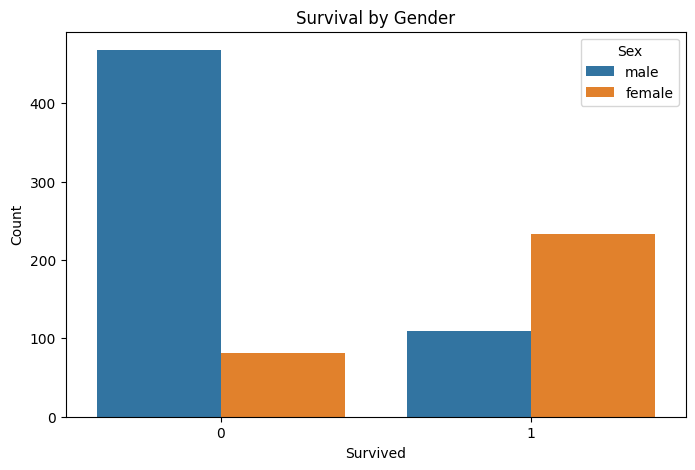

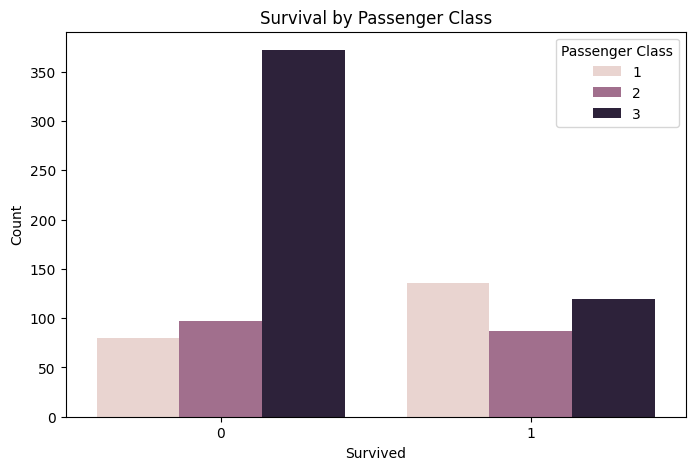

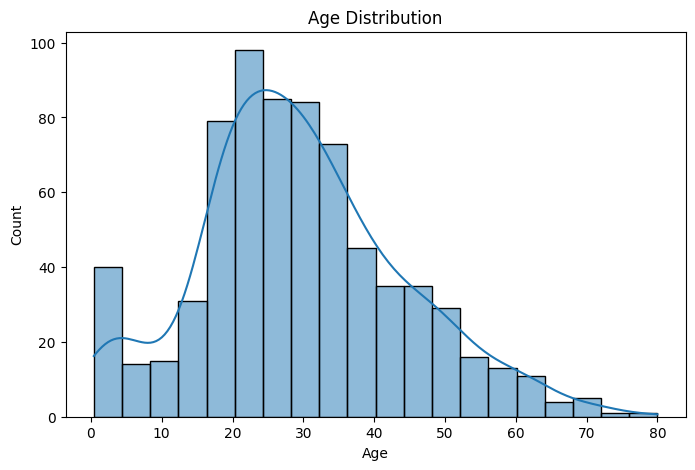

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Survival Count
plt.figure(figsize=(8, 5))
sns.countplot(df['Survived'])
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Plot 2: Survival by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()

# Plot 3: Survival by Passenger Class
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Passenger Class', loc='upper right')
plt.show()

# Plot 4: Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [11]:
# Check for missing values
df.isnull().sum()
# For numerical columns, you can fill missing values with mean or median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# For categorical columns, you can fill missing values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
#after EDA
df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [12]:
# Checking again for missing values
df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

**TRAIN AND TEST SPLITTING! as well model applying**

In [13]:
# Splitting the data into Train and Test sets
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Calculate the accuracy of the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training_Dataset_Accuracy:", train_accuracy)

# Confusion Matrix for training data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix:")
print(train_conf_matrix)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("testing_Dataset_Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(" testing Confusion Matrix:")
print(conf_matrix)


Training_Dataset_Accuracy: 0.8019662921348315
Training Confusion Matrix:
[[387  57]
 [ 84 184]]
testing_Dataset_Accuracy: 0.7988826815642458
 testing Confusion Matrix:
[[89 16]
 [20 54]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


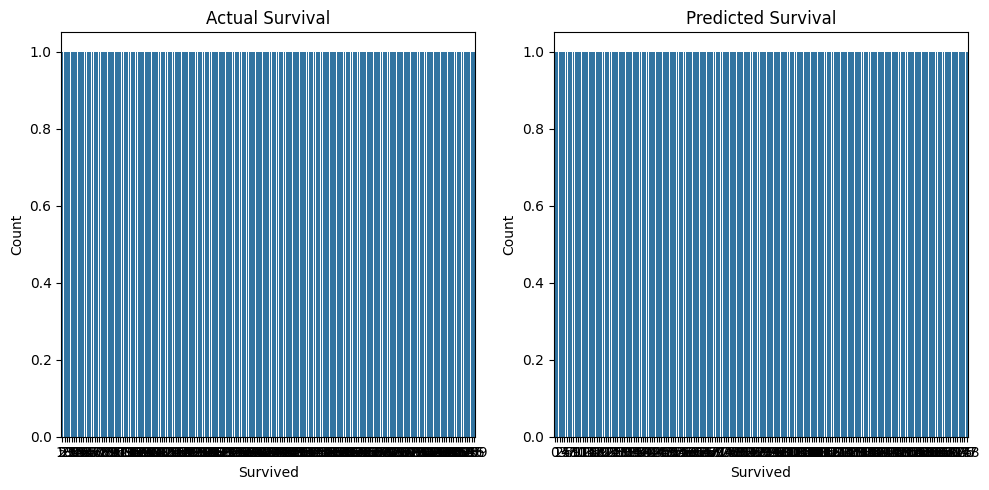

In [14]:
# Visualizing actual vs. predicted survival
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(y_test)
plt.title('Actual Survival')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(y_pred)
plt.title('Predicted Survival')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


therefore by lookingg at the above 2 plots we can conclude that our model is doing fine  